In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
df['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [3]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [4]:
df.isnull().sum().any()

False

In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.shape

(400, 5)

In [8]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [14]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=0)

nb_model = GaussianNB()
nb_model.fit(xtrain, ytrain)

ypred = nb_model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(ypred, ytest)
acc = accuracy_score(ypred, ytest)

print(f" CM :\n {cm}\nACC SCORE : {acc*100}%")

 CM :
 [[65  7]
 [ 3 25]]
ACC SCORE : 90.0%


<Axes: xlabel='Age'>

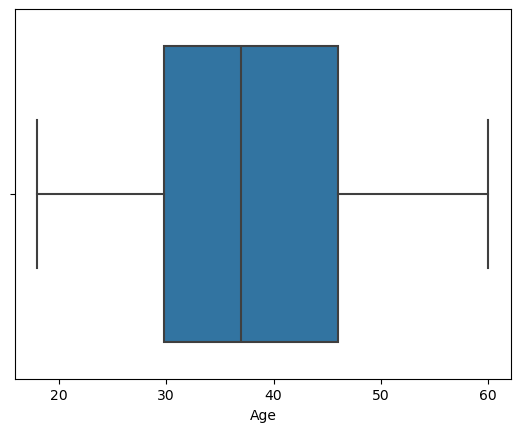

In [22]:
sns.boxplot(data = df, x ='Age')

In [27]:
res = pd.DataFrame({'Actual' : ytest, 'Predicted' : ypred})
res

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,1
264,1,1


In [35]:
# trying using labelEncodedr to convert male female to 0 and 1
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
X = df[['Gender', 'Age', 'EstimatedSalary']]
Y = df['Purchased']

model = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [36]:
conf = confusion_matrix(y_pred, y_test)
accr = accuracy_score(y_pred, y_test)

print(f"{conf}\n Accscore : {accr*100}%")

[[51  6]
 [ 7 36]]
 Accscore : 87.0%


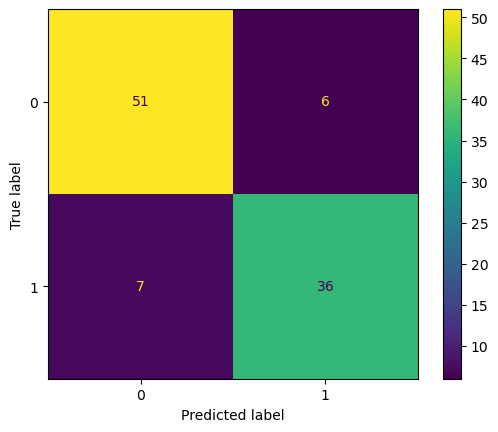

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = conf)
disp.plot()
plt.show()